In [8]:
import json
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [9]:
file_path = "heartbit.json"

if os.path.isfile(file_path):
    with open(file_path, "r") as file:
        hearbit_dict = json.load(file)

In [10]:
for k, values in hearbit_dict.items():
    break

In [11]:
datetime_objects = [datetime.fromisoformat(v[1]) for v in values]


In [22]:
# Check for more than 8 minutes difference
is_on = [(datetime_objects[i+1] - datetime_objects[i]).total_seconds() < 480 for i in range(len(datetime_objects)-1)]

In [23]:
times = datetime_objects[1:]

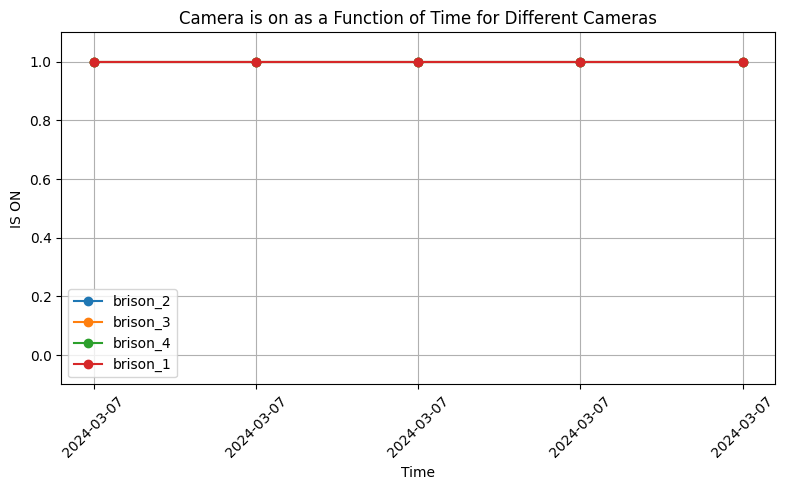

In [34]:

# Plotting
plt.figure(figsize=(8, 5))
for camera, values in hearbit_dict.items():
    if "brison" in camera:
        datetime_objects = [datetime.fromisoformat(v[1]) for v in values]
        # Check for more than 8 minutes difference and more than zeros
        is_on = [0<(datetime_objects[i+1] - datetime_objects[i]).total_seconds() < 480 for i in range(len(datetime_objects)-1)]
        times = [datetime.fromisoformat(v[0]) for v in values[1:]]
        plt.plot(times, is_on, marker='o', linestyle='-', label=camera)
plt.ylim(-0.1, 1.1)  # Adjust y-axis to better visualize boolean values
plt.xlabel('Time')
plt.ylabel('IS ON')
plt.title('Camera is on as a Function of Time for Different Cameras')
plt.grid(True)
plt.xticks(times, rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()